# Initial

In [2]:
!pip install smogn

In [89]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [90]:
df = pd.read_csv("final_df.csv")

In [91]:
label_df = df[["TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count']]
label_df

,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,15225,1772000,24,447000,4.000.000,4
1,15318,6458500,41,2248000,4.400.000,190
2,15325,930000,7,186000,4.900.000,7
3,15325,1213000,5,630500,4.100.000,33
4,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...
2504,15220,1088729,7,491000,5.000.000,4
2505,15228,1086891979,403,270673633,4.400.000,343
2506,15310,3465000,165,1816000,5.000.000,1
2507,15344,2687000,8,440000,4.600.000,60


In [92]:
df = df.drop(columns=['Unnamed: 0',"TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 
                      'Last1MothNominal', 'review_count','Unnamed: 0.1'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category,review_rating,market_share,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,60,976949084,4.110874,Kafe dan Minuman,4.000.000,0.000458,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,3,177,2297219696,5.181784,Otomotif,4.400.000,0.000979,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,0,28,153064649,3.367296,Restoran Umum,4.900.000,0.001215,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,2,70,813504922,4.262680,Apotek dan Produk Kesehatan Lainnya,4.100.000,0.000775,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,5,49,232321665,3.912023,Restoran Umum,4.400.000,0.011321,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,1,69,525602305,4.248495,Retail,5.000.000,0.000934,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,7,57,829581740,4.060443,Materials,4.400.000,0.326277,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,1,44,421505251,3.806662,Kafe dan Minuman,5.000.000,0.004308,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,31,60142072,3.465736,Retail,4.600.000,0.007316,0.290323,2.612903,4406.225806


In [93]:
final_df = df.drop(columns=['Kelurahan','category','market_share','review_rating'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.262680,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,10,4,1,7,57,829581740,4.060443,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [94]:
testString = "4.000.000"
def remove_nth_character(string, n):
  return float(string[:n] + string[n+1:])

print(remove_nth_character(testString,5))

label_df['review_rating'] = label_df['review_rating'].apply(lambda x : remove_nth_character(x,5))

4.0


In [95]:
X = final_df.values
Y = label_df['review_rating']

In [96]:
label_df

,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,15225,1772000,24,447000,4.0,4
1,15318,6458500,41,2248000,4.4,190
2,15325,930000,7,186000,4.9,7
3,15325,1213000,5,630500,4.1,33
4,15413,12818000,129,2630000,4.4,14
...,...,...,...,...,...,...
2504,15220,1088729,7,491000,5.0,4
2505,15228,1086891979,403,270673633,4.4,343
2506,15310,3465000,165,1816000,5.0,1
2507,15344,2687000,8,440000,4.6,60


In [97]:
print(Y)

0       4.0
1       4.4
2       4.9
3       4.1
4       4.4
       ... 
2504    5.0
2505    4.4
2506    5.0
2507    4.6
2508    5.0
Name: review_rating, Length: 2509, dtype: float64


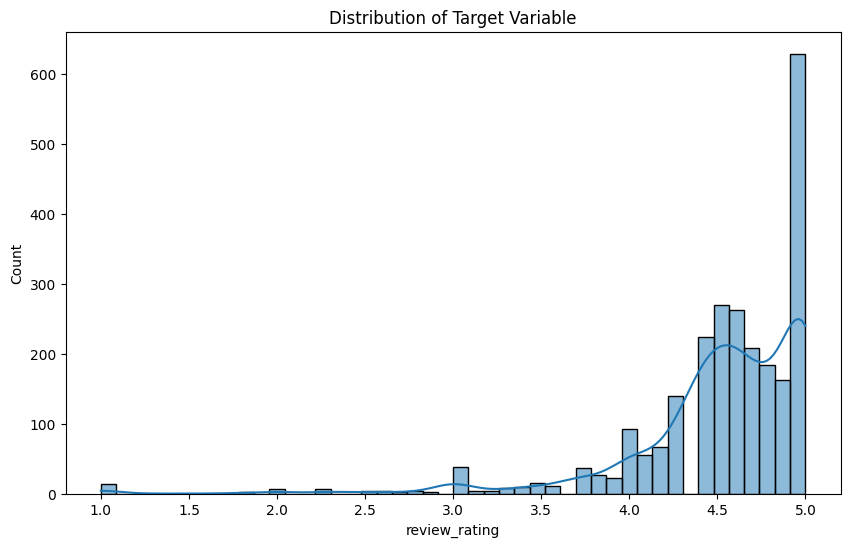

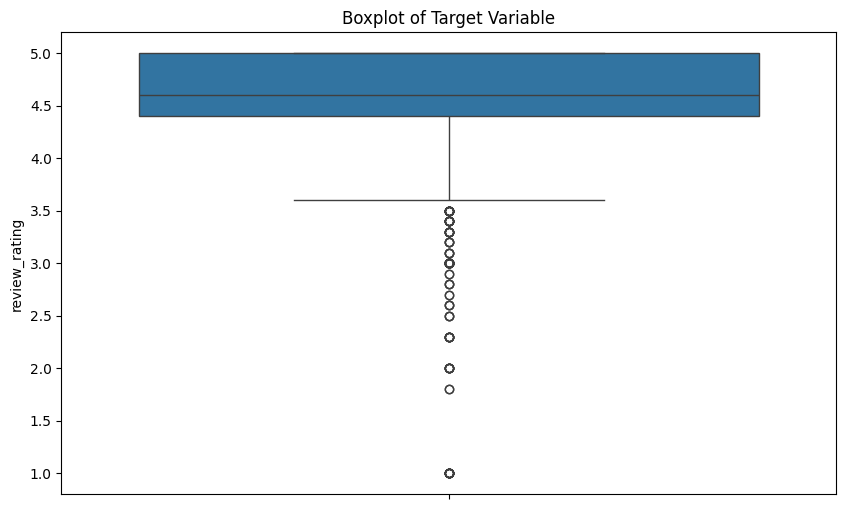

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y)
plt.title('Boxplot of Target Variable')
plt.show()

In [99]:
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = np.where((Y < lower_bound) | (Y > upper_bound))[0]
print(f"Number of outliers: {len(outliers)}")
print(f"Indices of outliers: {outliers}")

Lower bound: 3.500000000000001
Upper bound: 5.8999999999999995
Number of outliers: 121
Indices of outliers: [  19   20   48   65   77  118  136  138  148  182  226  231  246  271
  280  292  320  324  327  328  337  339  351  354  391  416  425  462
  467  483  484  485  510  554  556  563  574  662  683  720  730  825
  849  857  861  875  878  892  904  946  967 1006 1020 1034 1073 1124
 1129 1235 1272 1285 1290 1291 1328 1332 1342 1350 1352 1364 1365 1397
 1398 1440 1444 1485 1495 1502 1525 1536 1619 1651 1660 1666 1674 1710
 1725 1737 1742 1792 1841 1851 1863 1907 1911 1921 1955 1957 1988 1990
 1998 2026 2027 2080 2125 2143 2145 2174 2181 2190 2215 2250 2263 2268
 2278 2308 2397 2406 2419 2428 2432 2469 2479]


In [100]:
Y_clean = Y[(Y >= lower_bound) & (Y <= upper_bound)]
X_clean = X[(Y >= lower_bound) & (Y <= upper_bound)]

In [101]:
print(f"Original dataset size: {len(Y)}")
print(f"Cleaned dataset size: {len(Y_clean)}")

Original dataset size: 2509
Cleaned dataset size: 2388


In [102]:
Y_clean.describe()

count    2388.000000
mean        4.622739
std         0.338554
min         3.600000
25%         4.400000
50%         4.600000
75%         5.000000
max         5.000000
Name: review_rating, dtype: float64

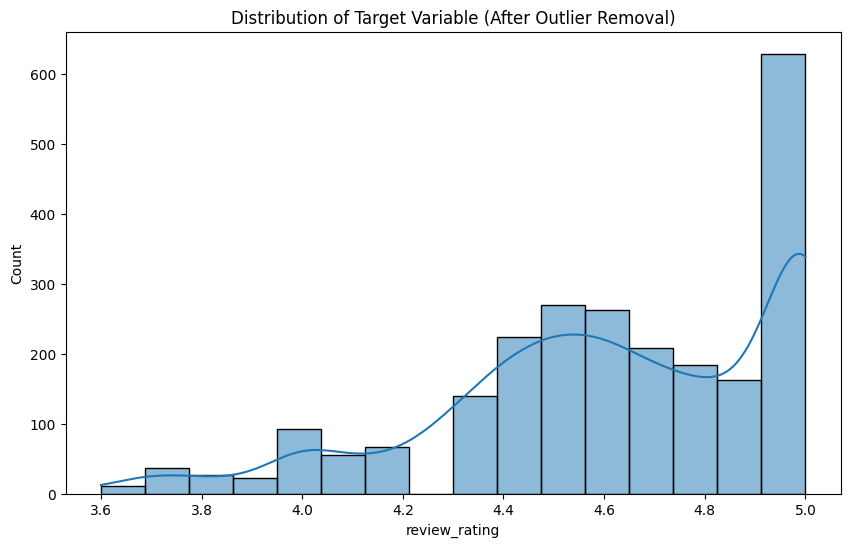

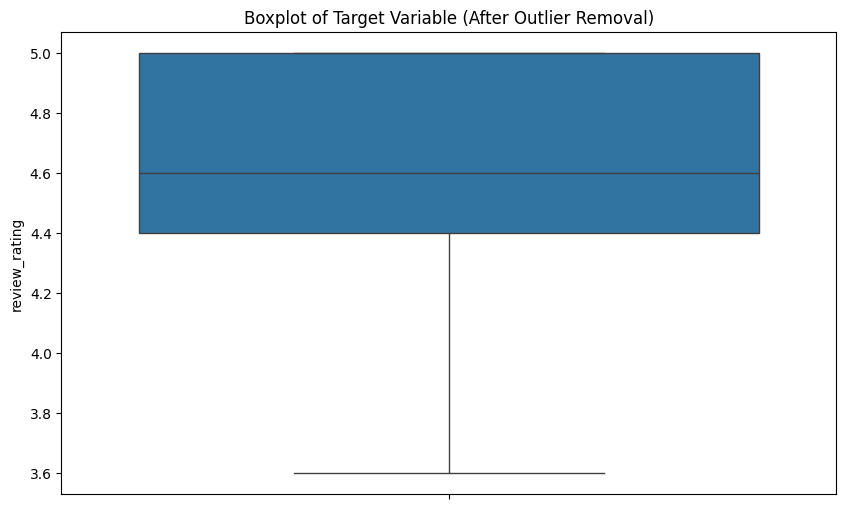

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(Y_clean, kde=True)
plt.title('Distribution of Target Variable (After Outlier Removal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y_clean)
plt.title('Boxplot of Target Variable (After Outlier Removal)')
plt.show()

In [104]:
df = pd.DataFrame(data=X_clean,columns=final_df.columns)
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2384,1,False,False,False,False,False,False,False,True,False,...,10,4,1,7,57,829581740,4.060443,0.017544,0.017544,383.350877
2385,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2386,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [105]:
df["review_rating"] = Y_clean
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,review_rating
0,5,False,False,False,False,True,False,False,False,False,...,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,4.0
1,2,False,False,False,False,False,False,False,False,False,...,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011,4.4
2,10,False,False,False,False,False,False,False,False,False,...,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,4.9
3,2,True,False,False,False,False,False,False,False,False,...,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286,4.1
4,25,False,False,False,False,False,False,False,False,False,...,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,7,False,False,False,False,False,False,False,False,False,...,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754,5.0
2384,1,False,False,False,False,False,False,False,True,False,...,4,1,7,57,829581740,4.060443,0.017544,0.017544,383.350877,4.0
2385,8,False,False,False,False,True,False,False,False,False,...,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636,4.6
2386,9,False,False,False,False,False,False,False,False,False,...,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806,5.0


In [106]:
df_perm = df

# Oversampling

In [73]:
from smogn import smoter

In [107]:
test_df_o = df
test_df_o.head()

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,review_rating
0,5,False,False,False,False,True,False,False,False,False,...,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,4.0
1,2,False,False,False,False,False,False,False,False,False,...,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011,4.4
2,10,False,False,False,False,False,False,False,False,False,...,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,4.9
3,2,True,False,False,False,False,False,False,False,False,...,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286,4.1
4,25,False,False,False,False,False,False,False,False,False,...,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,4.4


In [130]:
X = test_df_o.drop('review_rating', axis=1)
Y = test_df_o['review_rating']

In [131]:
print(X.shape)
print(Y.shape)
print(X.dtypes)
print(Y.dtype)

(2388, 91)
(2388,)
kompetitor_in_kelurahan                 object
Apotek dan Produk Kesehatan Lainnya     object
Clothing                                object
Entertainment                           object
Jasa                                    object
                                        ...   
log_category_density_in_area           float64
competition_index_squared              float64
competition_index_cubed                float64
log_competition_index                  float64
transaction_per_business               float64
Length: 91, dtype: object
float64


In [132]:
print(Y.name)

review_rating


In [80]:
resampled_df = smoter(
    data=temp,
    y=Y.name,
    k=5,  # number of nearest neighbors
    samp_method='extreme'  # focus on extreme values
)

KeyError: 'review_rating'

In [133]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [134]:
numeric_features = ['density_x_population', 'category_density_in_area', 'competition_index',
                    'jumlah_penduduk_akhir_2023','kompetitor_in_kelurahan',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pelajar', 'penduduk_pensiunan', 'penduduk_bekerja',
       'penduduk_0_sampai_4', 'penduduk_5_sampai_9', 'penduduk_10_sampai_14',
       'penduduk_15_sampai_19', 'penduduk_20_sampai_24',
       'penduduk_25_sampai_29', 'penduduk_30_sampai_34',
       'penduduk_35_sampai_39', 'penduduk_40_sampai_44',
       'penduduk_45_sampai_49', 'penduduk_50_sampai_54',
       'penduduk_55_sampai_59', 'penduduk_60_sampai_64',
       'penduduk_65_sampai_69', 'penduduk_70_keatas',
       'jumlah_Parks_per_kelurahan',
       'jumlah_Temporary Accomodations_per_kelurahan',
       'jumlah_Churches_per_kelurahan',
       'jumlah_Academic Institutions_per_kelurahan',
       'jumlah_Gas/SPBU_per_kelurahan', 'jumlah_Market_per_kelurahan',
       'jumlah_Offices_per_kelurahan', 'jumlah_Residences_per_kelurahan',
       'jumlah_Tourist_per_kelurahan', 'jumlah_Mall_per_kelurahan',
       'jumlah_Mosques_per_kelurahan',
       'jumlah_Transportation Hub_per_kelurahan',
       'jumlah_Medical Services_per_kelurahan', 'count_UMKM',
       'sum_transaction_nominal_per_area', 'log_count_UMKM','transaction_per_business',
                   'density_x_population_squared',
       'density_x_population_cubed', 'log_density_x_population',
       'category_density_in_area_squared', 'category_density_in_area_cubed',
       'log_category_density_in_area', 'competition_index_squared',
       'competition_index_cubed', 'log_competition_index']
categorical_features = ['Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung']

print(len(categorical_features))
print(len(numeric_features))
print(len(df.columns))

21
70
92


In [135]:

# Custom transformer for log transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)

# Advanced feature engineering
def advanced_feature_engineering(df):
    # List of columns to transform
    columns_to_transform = ['density_x_population', 'category_density_in_area', 'competition_index']
    
    for col in columns_to_transform:
        # Check if the column exists
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
            continue
        
        # Ensure the column is numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle potential negative or zero values
        df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number
        
        # Apply transformations
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Add other feature engineering steps here
    # For example:
    
    # Ratio features (make sure 'sum_transaction_nominal_per_area' and 'total_businesses_in_area' exist and are numeric)
    if all(col in df.columns for col in ['sum_transaction_nominal_per_area', 'count_UMKM']):
        df['transaction_per_business'] = (
            df['sum_transaction_nominal_per_area'].astype(float) / 
            df['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
        )
    
    return df

In [136]:
df.head()

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,density_x_population_squared,density_x_population_cubed,log_density_x_population,category_density_in_area_squared,category_density_in_area_cubed,log_category_density_in_area,competition_index_squared,competition_index_cubed,log_competition_index,transaction_per_business
0,5,False,False,False,False,True,False,False,False,False,...,4.974387e+06,1.109454e+10,7.710355,0.006944,0.000579,0.080043,0.173611,0.072338,0.348307,1.628248e+07
1,2,False,False,False,False,False,False,False,False,False,...,1.087509e+05,3.586322e+07,5.801435,0.000128,0.000001,0.011236,0.000511,0.000012,0.022347,1.297864e+07
2,10,False,False,False,False,False,False,False,False,False,...,5.330043e+07,3.891312e+11,8.895864,0.127551,0.045554,0.305382,12.755102,45.553936,1.519826,5.466595e+06
3,2,True,False,False,False,False,False,False,False,False,...,1.404108e+05,5.261393e+07,5.928829,0.000816,0.000023,0.028171,0.003265,0.000187,0.055570,1.162150e+07
5,12,False,False,False,False,False,False,False,False,False,...,1.685659e+08,2.188541e+12,9.471496,0.055363,0.013027,0.211309,7.972318,22.510075,1.341174,2.579839e+06


In [137]:
Y.shape

(2388,)

In [138]:
df['review_rating'] = Y

In [144]:
df = df.apply(pd.to_numeric)

In [145]:
# Anomaly detection
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Prepare data
df = advanced_feature_engineering(df)
df = remove_outliers(df, ['review_rating', 'density_x_population', 'category_density_in_area'])

X = df.drop('review_rating', axis=1)
y = df['review_rating']

In [146]:
df.shape

(2242, 92)

In [153]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [147]:
y.shape

(2242,)

In [148]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('log', LogTransformer()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42))
])

In [149]:
# Fit model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")

RMSE: 0.3652741886768185
R2 Score: -0.1556293716584376


In [150]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")
print(f"MAE Score: {mae}")

RMSE: 0.3652741886768185
R2 Score: -0.1556293716584376
MAE Score: 0.295314086705494


In [151]:
import pickle

In [154]:
with open('rating_model.pkl', 'wb') as f:
    pickle.dump(model, f)


Top 10 important features:
                                      original_feature  importance
1770               penduduk_beragama_islam penduduk_SD    0.030984
1674                penduduk_beragama_hindu count_UMKM    0.020418
4                                     Kafe dan Minuman    0.019643
1646    penduduk_beragama_buddha penduduk_60_sampai_64    0.016136
2575                        transaction_per_business^2    0.014236
1716  penduduk_beragama_hindu penduduk_beragama_buddha    0.011797
1792  penduduk_beragama_islam transaction_per_business    0.011468
1645      penduduk_beragama_buddha penduduk_5_sampai_9    0.010591
2565                          transaction_per_business    0.010425
1305           penduduk_SMA density_x_population_cubed    0.009246


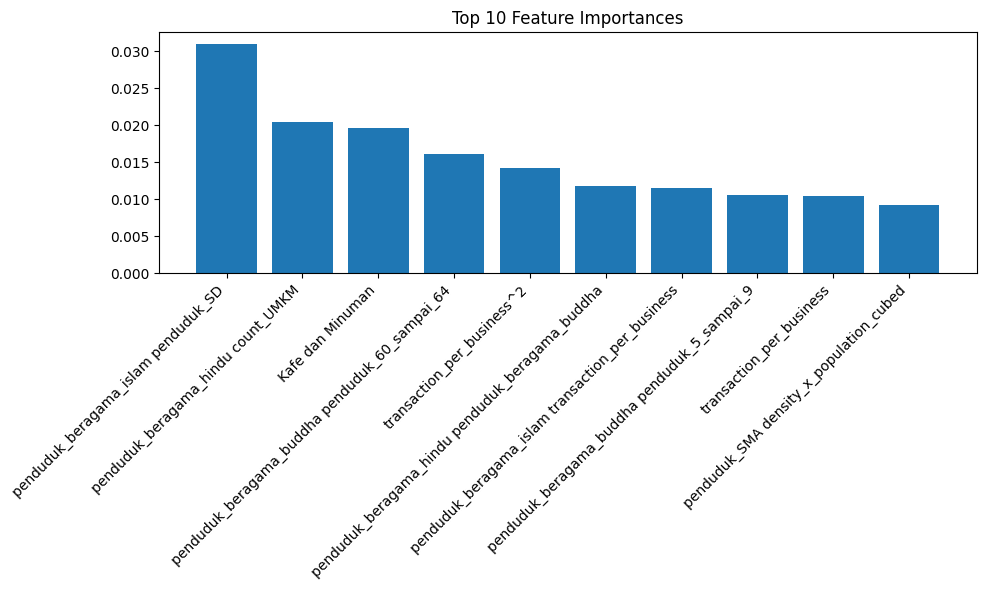

In [49]:
def get_feature_importance(model, numeric_features, categorical_features):
    # Get the polynomial feature names
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly.fit(X_train[numeric_features])
    poly_feature_names = poly.get_feature_names_out(numeric_features)
    
    # Combine all feature names in the order they were fed to the model
    all_feature_names = list(poly_feature_names) + categorical_features
    
    # Get feature importances from the model
    importances = model.named_steps['regressor'].feature_importances_
    
    # Create a DataFrame with feature names and their importances
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': importances
    })
    
    # Group by the original feature names and sum the importances
    feature_importance['original_feature'] = feature_importance['feature'].apply(lambda x: x.split()[0] if '^' in x else x)
    grouped_importance = feature_importance.groupby('original_feature')['importance'].sum().reset_index()
    
    # Sort by importance
    grouped_importance = grouped_importance.sort_values('importance', ascending=False)
    
    return grouped_importance

# After fitting your model, use this function:
feature_importance = get_feature_importance(model, numeric_features, categorical_features)

print("\nTop 10 important features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['original_feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

# Final